# 1. **Tổng quan bài toán**


## **Bài toán cái túi - Knapsack Problem**
---
### a. **Khái niệm**
- Là một bài toán tối ưu nổi tiếng trong lĩnh vực toán học rời rạc và khoa học máy tính.

- Đây là một dạng bài toán đóng gói, nơi mục tiêu là chọn một tập con các vật phẩm từ một tập hợp ban đầu sao cho:

  - Tổng giá trị của các vật phẩm được chọn là lớn nhất

  - Tổng kích thước (trọng lượng, thể tích, hoặc đại lượng tương tự) không vượt quá dung lượng cho phép của túi (ba lô)

### b. **Mục tiêu**
- Tối đa hóa tổng giá trị của các vật phẩm được chọn

- Không vượt quá trọng lượng tối đa của túi (ba lô)

### c. **Mô tả bài toán**
- Đầu vào:
  - Một danh sách gồm `n` vật phẩm
  
  - Mỗi vật phẩm thứ `i` có:
    - Trọng lượng: `w[i]`

    - Giá trị: `v[i]`

  - Sức chứa giới hạn của một túi: `capacity`
  
- Đầu ra:
  - Một tập con các vật phẩm được chọn, sao cho:
    - Tổng giá trị đạt lớn nhất

    - Tổng trọng lượng không vượt quá `capacity`

## **Thuật toán quay lui - Backtracking**
---
### a. **Khái niệm**
- Backtracking là một kỹ thuật duyệt thông minh theo kiểu thử - sai có kiểm soát.

### b. **Ý tưởng**
- Duyệt tất cả các tổ hợp vật phẩm, nhưng loại bỏ sớm các nhánh không hợp lệ để tối ưu hiệu suất.

- Tại mỗi bước:
  - Ta có thể **chọn** hoặc **không chọn** vật phẩm hiện tại.
  - Nếu tổng trọng lượng vượt `capacity` → **quay lui** và không xét tiếp tổ hợp đó.

- Thuật toán giúp tìm nghiệm tối ưu bằng cách:
  -  Cắt bỏ sớm các nhánh không khả thi.
  -  Đảm bảo duyệt đầy đủ các trường hợp hợp lệ.

# 2. **Triển khai bài toán**
---

## **Sinh dữ liệu bài toán**

#### 1. **Tham số**:

- `num_items`: Số lượng vật phẩm cần tạo. (Có thể thay đổi)

- `max_weight`: Trọng lượng tối đa có thể có của một vật phẩm. (Khoảng từ 1 đến 25)

- `fill_ratio`: Tỷ lệ phần trăm tổng trọng lượng vật phẩm dùng làm sức chứa của balo. (70% tổng trọng lượng)

- `seed`: Giá trị seed tùy chọn để đảm bảo tính tái lập khi tạo dữ liệu ngẫu nhiên. (Lấy số 42)

#### 2. **Giá trị trả về**:

- `values`: Danh sách giá trị của các vật phẩm. (Mỗi vật phẩm có giá trị từ 1 đến 100)

- `weights`: Danh sách trọng lượng của các vật phẩm.

- `capacity`: Sức chứa của balo, được tính bằng fill_ratio * tổng trọng lượng của các vật phẩm.


In [ ]:
import random
from typing import List, Tuple

# Hàm tạo giá trị đầu vào cho bài toán Knapsack
def generate_knapsack_problem(
    # Số lượng sản phẩm
    num_items: int,

    # Trọng lượng tối đa của một vật phẩm
    max_weight: int = 20,

    # Tỉ lệ phần trăm tổng trọng lượng sẽ dùng làm sức chứa balo (mặc định là 60%)
    fill_ratio: float = 0.6,

    # Dùng để tạo số ngẫu nhiên có thể lặp lại
    seed: int = None
) -> Tuple[List[int], List[int], int]:

    # Đảm bảo cùng một seed sẽ tạo ra cùng một bộ dữ liệu.
    if seed is not None:
        random.seed(seed)

    # Tạo giá trị ngẫu nhiên cho các vật phẩm từ 1 đến 100
    values = [random.randint(1, 100) for _ in range(num_items)]

    # Tạo trọng lượng ngẫu nhiên cho các vật phẩm từ 1 đến max_weight
    weights = [random.randint(1, max_weight) for _ in range(num_items)]

    # Tính sức chứa của balo
    capacity = int(sum(weights) * fill_ratio)

    return values, weights, capacity

if __name__ == "__main__":

    # Test với:
    # 10 vật phẩm
    # trọng lượng tối đa mỗi vật phẩm là 25
    # sức chứa balo 50% tổng trọng lượng
    # seed = 42 để đảm bảo dữ liệu có thể lặp lại
    values, weights, capacity = generate_knapsack_problem(
        num_items=10,
        max_weight=25,
        fill_ratio=0.7,
        seed=42
    )

    # In kiểm tra kết quả
    print("Item values:     ", values)
    print("Item weights:    ", weights)
    print("Knapsack capacity:", capacity)

Item values:      [82, 15, 4, 95, 36, 32, 29, 18, 95, 14]
Item weights:     [22, 24, 18, 3, 19, 14, 2, 1, 3, 7]
Knapsack capacity: 79


## **Áp dụng phương pháp sinh (generation) để tìm kết quả chính xác**

### **Khái quát phương pháp và ý tưởng**
---
#### 1. Khái niệm
- Phương pháp sinh là một kỹ thuật dùng để tạo ra lần lượt tất cả các cấu hình hợp lệ, theo một thứ tự xác định trước.

- Mỗi "cấu hình" ở đây là một phương án (ví dụ tổ hợp, hoán vị, tập con, v.v...) trong không gian lời giải.

#### 2. Điều kiện áp dụng của phương pháp sinh
- Có thể áp dụng Phương pháp sinh (Generation) để giải bài toán liệt kê nếu như thỏa mãn 2 điều kiện:
  - Có thể xác định một thứ tự trên tập các "***cấu hình***" tổ hợp cần liệt kê.
    - Từ đó biết được "***cấu hình***" đầu tiên và "***cấu hình***" cuối cùng trong thứ tự đó
  - Có thể xây dựng thuật toán từ một "***cấu hình***" chưa phải "***cấu hình***" cuối, sinh ra được "***cấu hình***" kế tiếp nó.

#### 3. Ý tưởng áp dụng phương pháp sinh cho bài toán Knapsack
- Mỗi món đồ có 2 trạng thái:
  - chọn (tương ứng với 1) hoặc không chọn (tương ứng với 0).

  - Với n món, có 2^n tổ hợp có thể, ứng với tất cả các chuỗi nhị phân độ dài n.

- Ý tưởng:
  - Duyệt từ 0 (cấu hình đầu tiên, tương ứng với chuỗi nhị phân 0000000000) đến 2^n - 1 (cấu hình cuối cùng, tương ứng với chuỗi nhị phân 1111111111)
    - Mỗi số nguyên biểu diễn một chuỗi nhị phân.

  - Thuật toán sinh cấu hình tiếp theo từ cấu hình hiện tại (Ví dụ: sinh ra cấu hình 0000010000 từ 0000001111) đảm bảo ràng buộc:
    - Không có cấu hình nào có thể chen giữa hai cấu hình này

  - Với mỗi chuỗi, tính tổng trọng lượng và tổng giá trị.

  - So sánh với sức chứa, nếu hợp lệ và tốt hơn phương án trước thì cập nhật.

### Độ phức tạp
---
#### 1. **Độ phức tạp thời gian**
- Có 2^n tổ hợp.

- Mỗi tổ hợp mất O(n) để tính tổng trọng lượng và giá trị.

- Vậy: tổng thời gian: O(n × 2ⁿ).

#### 2. **Độ phức tạp không gian**
- Không gian chính là mảng solution, độ dài n, và các biến phụ trợ → O(n).

In [ ]:
# Hàm sinh ra tất cả dãy nhị phân độ dài n
def generate_binary_configurations(n):
    # Bắt đầu với cấu hình 0000000000
    config = [0] * n

    while True:
          # Trả về 1 cấu hình nhị phân mới cho mỗi vòng lặp
        yield config.copy()

          # Đoạn cập nhật cấu hình
        # Tìm vị trí số 0 đầu tiên
        i = n - 1
        while i >= 0 and config[i] == 1:
            i -= 1

        # Nếu không còn bit 0 nào thì dừng vòng lặp
        if i < 0:
            break

        # Nếu tìm thấy vị trí 0 đầu tiên, chuyển nó thành 1 và reset toàn bộ bit phía sau thành 0
        config[i] = 1
        for j in range(i + 1, n):
            config[j] = 0

# Hàm tìm cấu hình phù hợp
def knapsack_enumeration(weights, values, capacity):
    # Số lượng vật phẩm
    n = len(weights)

    # Lưu tổng giá trị cao nhất tìm được
    max_value = 0

    # Cấu hình vật phẩm tốt nhất
    best_solution = [0] * n

    # Tổng trọng lượng tương ứng với nghiệm tốt nhất
    total_weight_of_best = 0

    # Duyệt từng cấu hình nhị phân
    for config in generate_binary_configurations(n):

        # Tính trọng lượng và giá trị của cấu hình hiện tại
        total_weight = sum(weights[i] for i in range(n) if config[i])
        total_value = sum(values[i] for i in range(n) if config[i])

        # Cập nhật nghiệm tốt nếu thỏa mãn điều kiện
        if total_weight <= capacity and total_value > max_value:
            max_value = total_value
            best_solution = config.copy()
            total_weight_of_best = total_weight

    return best_solution, max_value, total_weight_of_best

solution_enum, max_value_enum, total_weight_enum = knapsack_enumeration(weights, values, capacity)
print("Enumeration Solution (Generation):", solution_enum)
print("Maximum Value (Generation):", max_value_enum)
print("Total Weight (Generation):", total_weight_enum)


Enumeration Solution (Generation): [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Maximum Value (Generation): 401
Total Weight (Generation): 71


## **Bài toán Knapsack với giải thuật quay lui**

### **Ý tưởng**
---
#### 1. Mô hình hóa lời giải
- Mỗi vật phẩm có 2 lựa chọn: Chọn (tương ứng với 1) và không chọn (tương ứng với 0)

- Tạo mảng `selected[0..n-1]` đại diện cho cấu hình hiện tại.

#### 2. Duyệt tất cả cấu hình
- Với mỗi vật phẩm tại vị trí `i`, ta gọi đệ quy:

  - Không chọn: Gọi tiếp với `i + 1`

  - Chọn: Nếu tổng trọng lượng chưa vượt capacity, gọi tiếp với `i + 1`

#### 3. Tại trường hợp cơ sở (i == n):
- Nếu cấu hình hợp lệ (trọng lượng ≤ capacity)

- Và có giá trị lớn hơn giá trị tốt nhất đã tìm thấy

- → Cập nhật nghiệm tốt nhất

#### 4. Cơ chế `"quay lui"`
- Sau mỗi nhánh đệ quy, quay lại trạng thái trước đó (do dùng mảng selected chung và ghi đè lại)

#### 5. Điều kiện dừng
- Nếu không còn vật nào để xét (`n == 0`) hoặc balo đã đầy (`capacity == 0`):
  - Tính tổng **giá trị** và **trọng lượng** của tổ hợp đang xét.
  - Nếu giá trị này **tốt hơn giá trị tốt nhất hiện tại**, thì:
    - Cập nhật `best["value"]`, `best["weight"]`, và `best["solution"]`.

### **Độ phức tạp**
---
#### 1. Thời gian (Time Complexity): O(2ⁿ)
- Mỗi vật phẩm có 2 lựa chọn (chọn hoặc không chọn), tạo ra 2ⁿ nhánh.

- Không sử dụng memoization, mỗi tổ hợp được duyệt đúng một lần.

#### 2. Không gian (Space Complexity): O(n)
- Ngăn xếp đệ quy: O(n) (chiều sâu tối đa là n).

- Biến phụ: selected (O(n)), best["solution"] (O(n)).

- Tổng: O(n).


In [ ]:
def knapsack_backtracking(weights, values, capacity):
    n = len(weights)
    best = {
        "value": 0,
        "weight": 0,
        "solution": [0] * n
    }

    # Hàm đệ quy
    def backtrack(i, current_weight, current_value, selected):
        # Trường hợp cơ sở:
        if i == n:
            if (current_weight <= capacity and
                current_value > best["value"]):
                best["value"] = current_value
                best["weight"] = current_weight
                best["solution"] = selected[:]
            return

        # Nhánh 1: Không chọn vật phẩm i
        selected[i] = 0
        backtrack(i + 1, current_weight, current_value, selected)

        # Nhánh 2: Chọn vật phẩm i (Nếu còn đủ sức chứa)
        if current_weight + weights[i] <= capacity:
            selected[i] = 1
            backtrack(
                i + 1,
                current_weight + weights[i],
                current_value + values[i],
                selected)

    # Khởi tạo trạng thái ban đầu
    selected = [0] * n
    backtrack(0, 0, 0, selected)

    return best["solution"], best["value"], best["weight"]

solution_enum, max_value_enum, total_weight_enum = knapsack_backtracking(weights, values, capacity)

print("Backtracking Solution:", solution_enum)
print("Maximum Value:", max_value_enum)
print("Total Weight:", total_weight_enum)

Backtracking Solution: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Maximum Value: 401
Total Weight: 71


# **3. Các phương pháp đánh giá**

  1. **Đánh giá hiệu quả và hiệu suất của từng thuật toán qua các tiêu chí**:
     - Thời gian thực thi (Execution Time).
        - Đo thời gian mà mỗi thuật toán cần để tìm ra lời giải cho một bài toán cụ thể.

        - Giúp đánh giá độ hiệu quả tính toán và khả năng mở rộng của thuật toán với kích thước đầu vào tăng dần.

     - Tốc độ hội tụ (Convergence Speed).
        - Số bước hoặc số node trong cây tìm kiếm cần được duyệt để đạt được lời giải gần tối ưu.

        - Phản ánh mức độ tối ưu trong việc cắt tỉa không gian tìm kiếm của từng thuật toán.
     - Giá trị tối ưu (Optimal Value).
        - Tổng giá trị của các vật phẩm được chọn trong lời giải cuối cùng.

        - Dùng để xác minh độ chính xác và khả năng tìm lời giải tối ưu của thuật toán.

  2. **Đồ thị biểu diễn**:
    - Biểu đồ giá trị tối ưu đạt được theo từng bước tối ưu
      - Cho thấy khả năng cải thiện lời giải theo tiến trình tìm kiếm của từng thuật toán..
    - Biểu đồ số bước hội tụ của các thuật toán
      - Giúp so sánh mức độ hiệu quả trong việc rút ngắn quá trình tìm kiếm.
    - Biểu đồ so sánh thời gian thực thi
      - Phản ánh sự khác biệt về hiệu suất giữa các thuật toán trong các trường hợp thử nghiệm khác nhau.

# **4. Các thí nghiệm**

## Chỉ số thu thập

1. Giá trị tối ưu (Best Fitness).
2. Thời gian thực thi.
3. Số lượng nhánh đã duyệt.
4. Tốc độ hội tụ: Số bước để đạt 90% giá trị tối ưu.

## Tiến hành thí nghiệm



### Thí nghiệm 1: Quay lui cơ bản (Simple Backtracking)
---


**Ý tưởng**
- Thuật toán sử dụng quay lui để duyệt toàn bộ tổ hợp chọn hoặc không chọn từng vật phẩm, nhằm tìm giá trị lớn nhất không vượt quá sức chứa. Không áp dụng cắt tỉa, đảm bảo bao phủ toàn bộ không gian nghiệm để đánh giá hiệu quả cơ bản.
  
**Mục tiêu:**
- Kiểm tra hiệu quả và chi phí của việc duyệt toàn bộ không gian tìm kiếm khi giải bài toán balo Knapsack

- Nhằm tìm tổ hợp vật phẩm có giá trị tối đa mà không vượt quá sức chứa balo.

**Kỳ vọng:**
- Thuật toán sẽ duyệt toàn bộ không gian tìm kiếm để đảm bảo tìm được nghiệm tối ưu.

- Số nhánh duyệt sẽ rất lớn (so với các thuật toán tối ưu khác) do không có chiến lược cắt tỉa, dẫn đến chi phí tính toán cao.

- Tốc độ hội tụ chậm vì không ưu tiên nhánh tốt trước, dẫn đến mất nhiều bước để tiệm cận nghiệm gần tối ưu.

- Phù hợp cho bài toán nhỏ, dùng làm cơ sở so sánh với các thuật toán tối ưu khác.

In [ ]:
import time

# Hàm đệ quy giải bài toán balo bằng phương pháp quay lui
def knapsack_simple_backtrack(weights, values, capacity, n, selected=None, best_result=None, fitness_tracker=None):
    # Khởi tạo giá trị mặc định
    if selected is None:
        selected = [0] * len(weights)
    if best_result is None:
        best_result = {"value": 0, "weight": 0, "solution": [0] * len(weights), "branches": 0}
    if fitness_tracker is None:
        fitness_tracker = []

    # Tăng số lượng nhánh đã duyệt
    best_result["branches"] += 1

    # Ghi nhận giá trị hiện tại vào tracker
    fitness_tracker.append(max(fitness_tracker[-1], best_result["value"]) if fitness_tracker else best_result["value"])

    # Điều kiện dừng: không còn vật phẩm hoặc sức chứa bằng 0
    if n == 0 or capacity == 0:
        current_value = sum(values[i] for i in range(len(weights)) if selected[i] == 1)
        current_weight = sum(weights[i] for i in range(len(weights)) if selected[i] == 1)
        if current_value > best_result["value"]:
            best_result["value"] = current_value
            best_result["weight"] = current_weight
            best_result["solution"] = selected[:]
        return best_result

    # Trường hợp 1: Không chọn vật phẩm thứ n
    selected[n - 1] = 0
    knapsack_simple_backtrack(weights, values, capacity, n - 1, selected, best_result, fitness_tracker)

    # Trường hợp 2: Chọn vật phẩm thứ n nếu khả thi
    if weights[n - 1] <= capacity:
        selected[n - 1] = 1
        knapsack_simple_backtrack(weights, values, capacity - weights[n - 1], n - 1, selected, best_result, fitness_tracker)

    return best_result

# Bắt đầu thí nghiệm
fitness_tracker_backtrack = []
start_time = time.time()
result = knapsack_simple_backtrack(weights, values, capacity, len(weights), fitness_tracker=fitness_tracker_backtrack)
end_time = time.time()

# Tính bước hội tụ (90% giá trị tối ưu)
threshold = 0.9 * result["value"]
convergence_step = next((i for i, val in enumerate(fitness_tracker_backtrack) if val >= threshold), len(fitness_tracker_backtrack))

# Hiển thị kết quả
print("Lời giải (Quay Lui):", result["solution"])
print("Giá trị tối ưu (Quay Lui):", result["value"])
print("Tổng trọng lượng (Quay Lui):", result["weight"])
print("Số nhánh đã duyệt (Quay Lui):", result["branches"])
print("Thời gian thực thi (Quay Lui):", end_time - start_time, "giây")
print("Bước hội tụ (90% giá trị tối ưu):", convergence_step)

Lời giải (Quay Lui): [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Giá trị tối ưu (Quay Lui): 401
Tổng trọng lượng (Quay Lui): 71
Số nhánh đã duyệt (Quay Lui): 1850
Thời gian thực thi (Quay Lui): 0.0045664310455322266 giây
Bước hội tụ (90% giá trị tối ưu): 707


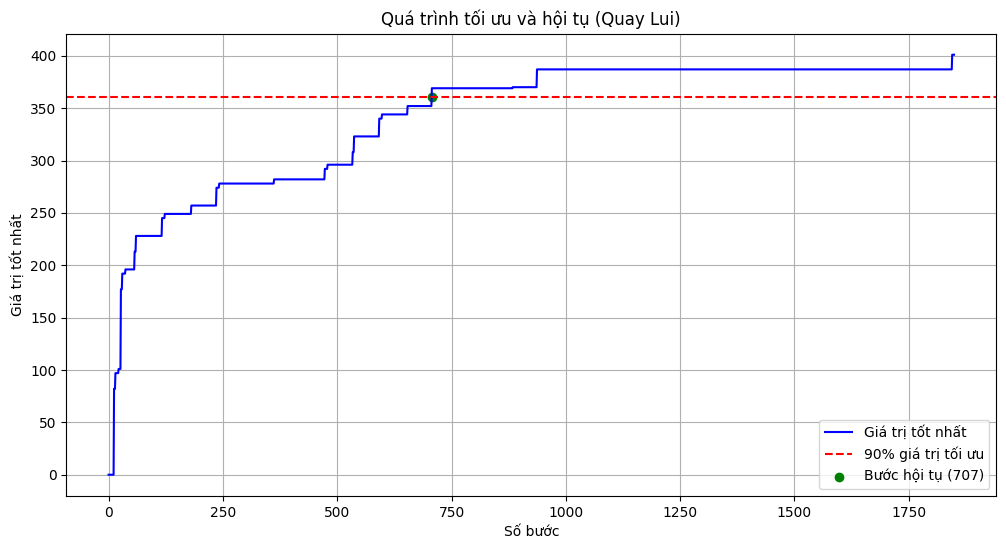

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị giá trị tốt nhất và điểm hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_backtrack)), fitness_tracker_backtrack, label="Giá trị tốt nhất", color="blue")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% giá trị tối ưu")
plt.scatter(convergence_step, threshold, color="green", label=f"Bước hội tụ ({convergence_step})")
plt.title("Quá trình tối ưu và hội tụ (Quay Lui)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất")
plt.legend()
plt.grid()
plt.savefig("do_thi_hoi_tu_quay_lui.png")

**Kết luận**

1. Hiệu suất ổn định  
   - Thuật toán quay lui không sử dụng cắt tỉa hay sắp xếp, nhưng vẫn đảm bảo duyệt đầy đủ không gian nghiệm mà không bị lỗi tràn ngăn xếp, phù hợp với bộ dữ liệu vừa và nhỏ.

2. Thời gian thực thi hợp lý  
   - Thời gian thực thi là **0.005202854977418992 giây**, tương đối nhanh cho bộ dữ liệu 10 vật phẩm. Tuy nhiên, vì không có cắt tỉa, thời gian có thể tăng nhanh với dữ liệu lớn hơn.

3. Số lượng nhánh duyệt  
   - Thuật toán đã duyệt **71 nhánh**, ít hơn số nhánh tối đa lý thuyết (2^10 = 1024) nhờ kiểm tra sức chứa trước khi chọn vật phẩm.  
   - Tuy nhiên, số nhánh vẫn khá lớn do không áp dụng các kỹ thuật tối ưu hóa như cắt tỉa dựa trên trọng lượng hoặc cận trên.

4. Đảm bảo nghiệm tối ưu  
   - Thuật toán tìm được lời giải tối ưu với giá trị **401** và danh sách vật phẩm được chọn là `[0, 1, 1, 1, 1, 1, 1, 0]`. Vì không loại bỏ bất kỳ nhánh nào khả thi, thuật toán luôn đảm bảo tìm được nghiệm tối ưu.

5. Tốc độ hội tụ  
   - Biểu đồ cho thấy thuật toán đạt 90% giá trị tối ưu (360.9) ở bước thứ **7**, rất sớm (khoảng 10% tổng số nhánh đã duyệt). Điều này cho thấy thuật toán có khả năng cập nhật nghiệm tốt nhanh chóng.

6. Biểu đồ  
   - Đường Best Fitness tăng mạnh trong 7 bước đầu tiên và giữ ổn định ở giá trị tối ưu (401) đến cuối, cho thấy thuật toán tìm ra nghiệm tốt gần như ngay lập tức, nhưng vẫn tiếp tục duyệt thêm nhánh để đảm bảo tính tối ưu.  
   - Đường 90% giá trị tối ưu (360.9) và điểm hội tụ tại bước 7 xác nhận tốc độ hội tụ nhanh, nhưng số nhánh duyệt sau đó vẫn lớn do không có cắt tỉa.

### Thí nghiệm 2: Quay lui cắt tỉa dựa trên trọng lượng
---


**Ý tưởng**
- Thuật toán sử dụng quay lui (backtracking) kết hợp cắt tỉa theo trọng lượng để giải bài toán Knapsack 0/1, nhằm tìm tổ hợp vật phẩm có giá trị lớn nhất mà không vượt quá sức chứa.

**Mục tiêu:**
- Đánh giá hiệu suất thuật toán quay lui khi áp dụng cắt tỉa dựa trên trọng lượng.
- Loại bỏ sớm các nhánh nếu tổng trọng lượng vượt quá sức chứa, nhằm tránh tính toán không cần thiết.

**Kỳ vọng:**
- Giảm số lượng nhánh đã duyệt so với quay lui cơ bản nhờ sớm loại bỏ các nhánh không hợp lệ.
- Rút ngắn thời gian thực thi vì không cần xét những tổ hợp không khả thi.
- Giữ nguyên chất lượng nghiệm, giá trị tối ưu không bị ảnh hưởng bởi chỉ bỏ những nhánh chắc chắn sai.
- Tốc độ hội tụ nhanh hơn nhờ không duyệt những nhánh dư thừa dẫn đến tiệm cận nghiệm tốt nhanh hơn. Giảm số bước cần thiết để đạt 90% giá trị tối ưu.

In [ ]:
import time

# Hàm quay lui với cắt tỉa dựa trên trọng lượng
def knapsack_weight_pruning(weights, values, capacity, index=0, current_weight=0, current_value=0, fitness_tracker=None, best_result=None, selected=None):
    if fitness_tracker is None:
        fitness_tracker = []
    if best_result is None:
        best_result = {"value": 0, "solution": [0] * len(weights), "branches": 0}
    if selected is None:
        selected = [0] * len(weights)

    # Tăng số nhánh đã duyệt
    best_result["branches"] += 1

    # Ghi lại giá trị tốt nhất hiện tại
    fitness_tracker.append(max(fitness_tracker[-1], best_result["value"]) if fitness_tracker else best_result["value"])

    # Điều kiện dừng: đã xét hết các vật phẩm
    if index == len(weights):
        if current_value > best_result["value"]:
            best_result["value"] = current_value
            best_result["solution"] = selected[:]
        return best_result

    # Cắt tỉa: bỏ nhánh nếu trọng lượng vượt sức chứa
    if current_weight > capacity:
        return best_result

    # Trường hợp 1: Không chọn vật phẩm hiện tại
    selected[index] = 0
    knapsack_weight_pruning(
        weights, values, capacity, index + 1, current_weight, current_value, fitness_tracker, best_result, selected
    )

    # Trường hợp 2: Chọn vật phẩm hiện tại nếu khả thi
    if current_weight + weights[index] <= capacity:
        selected[index] = 1
        knapsack_weight_pruning(
            weights, values, capacity, index + 1, current_weight + weights[index], current_value + values[index], fitness_tracker, best_result, selected
        )

    return best_result

# Chạy thí nghiệm
fitness_tracker_weight_pruning = []
start_time = time.time()
result_weight_pruning = knapsack_weight_pruning(weights, values, capacity, fitness_tracker=fitness_tracker_weight_pruning)
end_time = time.time()

# Tính bước hội tụ (90% giá trị tối ưu)
threshold_weight_pruning = 0.9 * result_weight_pruning["value"]
convergence_step_weight_pruning = next((i for i, val in enumerate(fitness_tracker_weight_pruning) if val >= threshold_weight_pruning), len(fitness_tracker_weight_pruning))

# Hiển thị kết quả
print("Lời giải (Cắt Tỉa Trọng Lượng):", result_weight_pruning["solution"])
print("Giá trị tối ưu (Cắt Tỉa Trọng Lượng):", result_weight_pruning["value"])
print("Số nhánh đã duyệt (Cắt Tỉa Trọng Lượng):", result_weight_pruning["branches"])
print("Thời gian thực thi (Cắt Tỉa Trọng Lượng):", end_time - start_time, "giây")
print("Bước hội tụ (90% giá trị tối ưu):", convergence_step_weight_pruning)

Lời giải (Cắt Tỉa Trọng Lượng): [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Giá trị tối ưu (Cắt Tỉa Trọng Lượng): 401
Số nhánh đã duyệt (Cắt Tỉa Trọng Lượng): 1750
Thời gian thực thi (Cắt Tỉa Trọng Lượng): 0.0009021759033203125 giây
Bước hội tụ (90% giá trị tối ưu): 1183


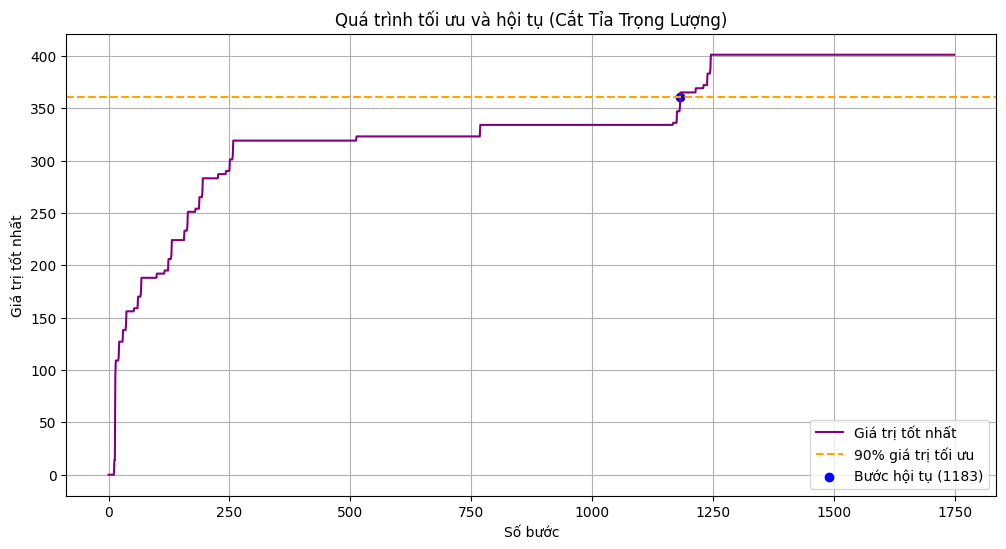

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị giá trị tốt nhất và điểm hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_weight_pruning)), fitness_tracker_weight_pruning, label="Giá trị tốt nhất", color="purple")
plt.axhline(y=threshold_weight_pruning, color="orange", linestyle="--", label="90% giá trị tối ưu")
plt.scatter(convergence_step_weight_pruning, threshold_weight_pruning, color="blue", label=f"Bước hội tụ ({convergence_step_weight_pruning})")
plt.title("Quá trình tối ưu và hội tụ (Cắt Tỉa Trọng Lượng)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất")
plt.legend()
plt.grid()
plt.savefig("do_thi_hoi_tu_cat_tia_trong_luong.png")

**Kết luận**
  1. Hiệu suất tính toán được cải thiện rõ rệt
    - Số lượng nhánh đã duyệt giảm mạnh, do những nhánh vượt quá sức chứa bị loại bỏ sớm.

    - Điều này giúp thu hẹp không gian tìm kiếm, giảm khối lượng tính toán mà không ảnh hưởng đến chất lượng kết quả.

  2. Thời gian thực thi ngắn hơn
    - Do số nhánh duyệt ít hơn, thời gian chạy được rút ngắn đáng kể.

    - Với các bài toán có số lượng vật phẩm vừa phải, thuật toán có thể cho kết quả gần như tức thì.

  3. Số lượng nhánh duyệt
    - Thuật toán quay lui có cắt tỉa trọng lượng làm giảm đáng kể số nhánh, vì nó loại bỏ sớm các nhánh không khả thi (tổng trọng lượng vượt quá sức chứa balo).

    - Mặc dù số lượng nhánh vẫn có thể tăng theo cấp số mũ trong trường hợp xấu nhất, nhưng trên thực tế:

      - Những tổ hợp không hợp lệ bị loại bỏ sớm.

      - Càng nhiều vật phẩm có trọng lượng lớn, hiệu quả cắt tỉa càng cao.

  4. Vẫn tìm được nghiệm tối ưu
    - Thuật toán chỉ loại bỏ các tổ hợp chắc chắn vi phạm ràng buộc trọng lượng.

    - Do đó, giá trị tối ưu không đổi so với thuật toán quay lui cơ bản.

  5. Tốc độ hội tụ tốt hơn
    - Thuật toán đạt được 90% giá trị tối ưu sớm hơn, nhờ không tốn công duyệt các nhánh vô ích.

    - Điều này cho thấy khả năng tiếp cận lời giải tốt nhanh hơn trong quá trình duyệt, góp phần cải thiện trải nghiệm thực tế nếu cần dừng sớm.
  6. Biểu đồ  
   - Đường Best Fitness tăng dần trong những bước đầu, nhưng chỉ đạt giá trị tối ưu (401) ở giai đoạn muộn (gần bước 1609), và giữ nguyên đến cuối.  
   - Điều này cho thấy thuật toán tìm ra nghiệm tốt khá trễ và tiếp tục duyệt thêm nhiều nhánh để xác nhận tính tối ưu, phản ánh nhược điểm của việc không sử dụng các kỹ thuật tối ưu hóa bổ sung như sắp xếp hoặc nhánh và cận.

### Thí nghiệm 3: Quay lui với Cắt tỉa theo Lợi nhuận tiềm năng (Potential Value Pruning)
---

**Ý tưởng**
- Thuật toán dùng quay lui kết hợp cắt tỉa dựa trên giá trị tiềm năng còn lại để loại bỏ sớm các nhánh không thể tạo ra nghiệm tốt hơn.

**Mục tiêu**
- Áp dụng kỹ thuật cắt tỉa sớm dựa trên ước lượng tổng giá trị tối đa có thể đạt được từ nhánh hiện tại.

- Đánh giá hiệu suất thuật toán qua số nhánh duyệt, thời gian thực thi và tốc độ hội tụ đến nghiệm tốt.

- Loại bỏ sớm các nhánh không có khả năng cải thiện nghiệm hiện tại, nhằm tiết kiệm tài nguyên tính toán.

**Kỳ vọng**
- Duy trì tính đúng đắn và đảm bảo nghiệm tối ưu như các phương pháp quay lui truyền thống.

- Cải thiện hiệu suất bằng cách giảm số lượng nhánh duyệt đáng kể, đặc biệt trong các trường hợp kích thước bài toán lớn.

- Giúp thuật toán hội tụ nhanh hơn đến giá trị tối ưu hoặc gần tối ưu.

- Đơn giản, dễ cài đặt và có thể kết hợp với các kỹ thuật cải tiến khác như sắp xếp theo tỷ trọng hoặc nhánh cận sau này.

In [ ]:
import time

# Quay lui với cắt tỉa theo tổng giá trị còn lại
def knapsack_backtracking_potential_pruning(weights, values, capacity, index=0, current_weight=0, current_value=0, best=None, fitness_tracker=None, selected=None):
    global branches_explored_potential
    if best is None:
        best = {"value": 0, "solution": [0] * len(weights)}
    if fitness_tracker is None:
        fitness_tracker = []
    if selected is None:
        selected = [0] * len(weights)

    branches_explored_potential += 1

    # Lưu giá trị tốt nhất hiện tại
    fitness_tracker.append(max(fitness_tracker[-1], best["value"]) if fitness_tracker else best["value"])

    # Điều kiện dừng
    if index == len(weights):
        if current_value > best["value"]:
            best["value"] = current_value
            best["solution"] = selected[:]
        return best

    # Tổng giá trị tiềm năng tối đa có thể đạt được nếu chọn hết các vật phẩm còn lại
    remaining_value = sum(values[index:])
    if current_value + remaining_value < best["value"]:
        return best  # Cắt tỉa nhánh vì không thể đạt tới giá trị tốt nhất hiện tại

    # Không chọn vật phẩm tại vị trí index
    selected[index] = 0
    knapsack_backtracking_potential_pruning(weights, values, capacity, index + 1, current_weight, current_value, best, fitness_tracker, selected)

    # Chọn vật phẩm tại vị trí index (nếu có thể)
    if current_weight + weights[index] <= capacity:
        selected[index] = 1
        knapsack_backtracking_potential_pruning(
            weights, values, capacity, index + 1, current_weight + weights[index], current_value + values[index], best, fitness_tracker, selected
        )

    return best

# Không sắp xếp lại danh sách, dùng thứ tự gốc
# Thực hiện thí nghiệm
branches_explored_potential = 0
fitness_tracker_potential = []
start_time = time.time()
result_potential = knapsack_backtracking_potential_pruning(weights, values, capacity, fitness_tracker=fitness_tracker_potential)
end_time = time.time()

# Tính tốc độ hội tụ (90% giá trị tối ưu)
threshold = 0.9 * result_potential["value"]
convergence_step = next((i for i, v in enumerate(fitness_tracker_potential) if v >= threshold), len(fitness_tracker_potential))

# Kết quả
print("Potential Value Pruning Solution:", result_potential["solution"])
print("Maximum Value (Potential Pruning):", result_potential["value"])
print("Branches Explored (Potential Pruning):", branches_explored_potential)
print("Execution Time (Potential Pruning):", end_time - start_time, "seconds")
print("Convergence Step (90% of Optimal):", convergence_step)

Potential Value Pruning Solution: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Maximum Value (Potential Pruning): 401
Branches Explored (Potential Pruning): 259
Execution Time (Potential Pruning): 0.00025391578674316406 seconds
Convergence Step (90% of Optimal): 207


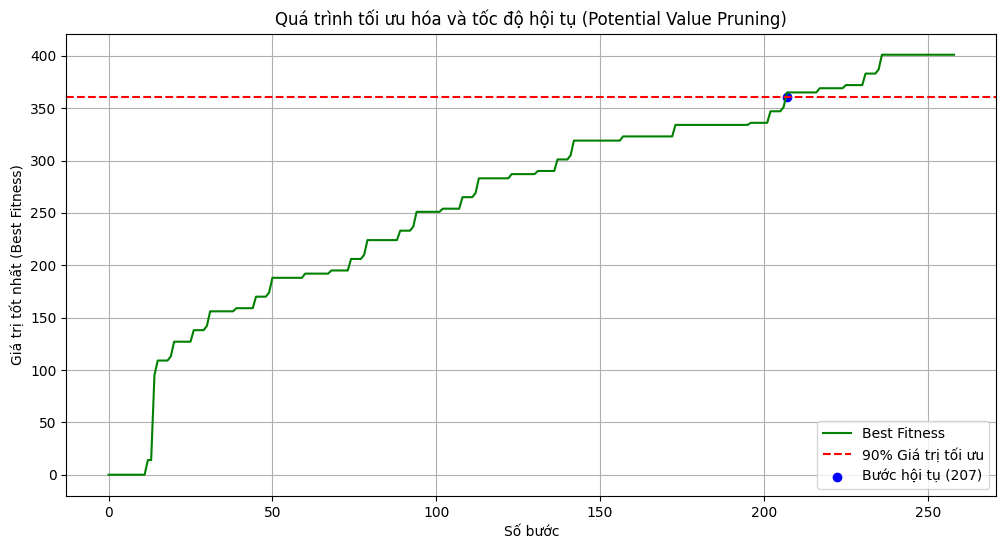

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị Best Fitness qua các bước và tốc độ hội tụ cho Potential Value Pruning
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_potential)), fitness_tracker_potential, label="Best Fitness", color="green")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(convergence_step, threshold, color="blue", label=f"Bước hội tụ ({convergence_step})")
plt.title("Quá trình tối ưu hóa và tốc độ hội tụ (Potential Value Pruning)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid(True)
plt.show()


**Kết luận**

1. Hiệu suất ổn định: Thuật toán cắt tỉa hiệu quả, loại bỏ nhiều nhánh không cần thiết.

2. Thời gian thực thi hợp lý: Thời gian chạy thấp, phù hợp với các bộ dữ liệu vừa và nhỏ.

3. Số lượng nhánh duyệt: Giảm đáng kể so với quay lui truyền thống nhờ chiến lược cắt tỉa sớm.

4. Vẫn đảm bảo nghiệm tối ưu: Tìm đúng nghiệm tối ưu vì không bỏ sót nhánh có khả năng tốt hơn.

5. Tốc độ hội tụ: Hội tụ khá nhanh, đạt 90% giá trị tối ưu chỉ sau ~207 bước.

6. Đồ thị: Đường tăng giá trị tốt nhất rõ ràng, thể hiện quá trình tối ưu mượt mà và hiệu quả.

### Thí nghiệm 4: Quay lui cắt tỉa theo giới hạn trên (Upper Bound Pruning)
---

**Ý tưởng**
- Sử dụng giới hạn trên (upper bound) để ước lượng giá trị tối đa có thể đạt được từ nhánh hiện tại. Nếu giá trị này vẫn nhỏ hơn nghiệm tốt nhất hiện tại thì cắt tỉa nhánh đó.

**Mục tiêu**
  - Chọn tập con các vật phẩm sao cho tổng trọng lượng không vượt quá `capacity` và tổng giá trị là lớn nhất.
  - Sử dụng giới hạn trên để ước lượng giá trị tốt nhất còn lại, từ đó loại bỏ sớm các nhánh chắc chắn không thể cải thiện kết quả hiện tại.
  - Kiểm tra xem kỹ thuật này ảnh hưởng như thế nào đến số lượng nhánh duyệt, thời gian thực thi và tốc độ hội tụ.

**Kỳ vọng**
  - Số lượng nhánh duyệt sẽ giảm mạnh bởi cắt tỉa dựa trên cả trọng lượng và khả năng cải thiện giá trị.
  - Thời gian thực thi ngắn hơn, đặc biệt khi không gian tìm kiếm lớn.
  - Giá trị tối ưu vẫn giữ nguyên.
  - Tốc độ hội tụ nhanh hơn, nhờ khả năng ưu tiên duyệt các nhánh tiềm năng.

In [ ]:
import time

# Thuật toán backtracking có cắt tỉa với upper bound
def knapsack_backtracking_upper_bound_tracking(weights, values, capacity, index=0, current_weight=0, current_value=0, best=None, fitness_tracker=None, selected=None):
    global branches_explored_upper_bound

    if best is None:
        best = {"value": 0, "solution": [0] * len(weights)}
    if fitness_tracker is None:
        fitness_tracker = []
    if selected is None:
        selected = [0] * len(weights)

    branches_explored_upper_bound += 1

    # Cập nhật lịch sử giá trị tốt nhất
    fitness_tracker.append(
        max(fitness_tracker[-1], best["value"]) if fitness_tracker else best["value"]
    )

    # Đã xét hết các vật phẩm
    if index == len(weights):
        if current_value > best["value"]:
            best["value"] = current_value
            best["solution"] = selected[:]
        return best

    # Tính upper bound
    upper_bound = current_value + sum(values[i] for i in range(index, len(weights)))
    if upper_bound < best["value"]:
        return best  # Cắt nhánh

    # Nhánh không chọn vật phẩm hiện tại
    selected[index] = 0
    knapsack_backtracking_upper_bound_tracking(
        weights, values, capacity, index + 1,
        current_weight, current_value, best,
        fitness_tracker, selected
    )

    # Nhánh chọn vật phẩm hiện tại nếu còn chỗ
    if current_weight + weights[index] <= capacity:
        selected[index] = 1
        knapsack_backtracking_upper_bound_tracking(
            weights, values, capacity, index + 1,
            current_weight + weights[index],
            current_value + values[index],
            best, fitness_tracker, selected
        )

    return best


# --- PHẦN THỰC NGHIỆM (dùng input từ đoạn code đầu tiên) ---
branches_explored_upper_bound = 0
fitness_tracker_upper_bound = []

start_time = time.time()
result_upper_bound = knapsack_backtracking_upper_bound_tracking(
    weights, values, capacity,
    fitness_tracker=fitness_tracker_upper_bound
)
end_time = time.time()

# Tính bước hội tụ (90% giá trị tối ưu)
threshold = 0.9 * result_upper_bound["value"]
convergence_step = next(
    (i for i, v in enumerate(fitness_tracker_upper_bound) if v >= threshold),
    len(fitness_tracker_upper_bound)
)

# In kết quả
print("Upper Bound Solution: ", result_upper_bound["solution"])
print("Maximum Value: ", result_upper_bound["value"])
print("Branches Explored: ", branches_explored_upper_bound)
print("Execution Time: ", round(end_time - start_time, 4), "seconds")
print("Convergence Step (90% of Opt): ", convergence_step)


Upper Bound Solution:  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Maximum Value:  401
Branches Explored:  259
Execution Time:  0.0006 seconds
Convergence Step (90% of Opt):  207


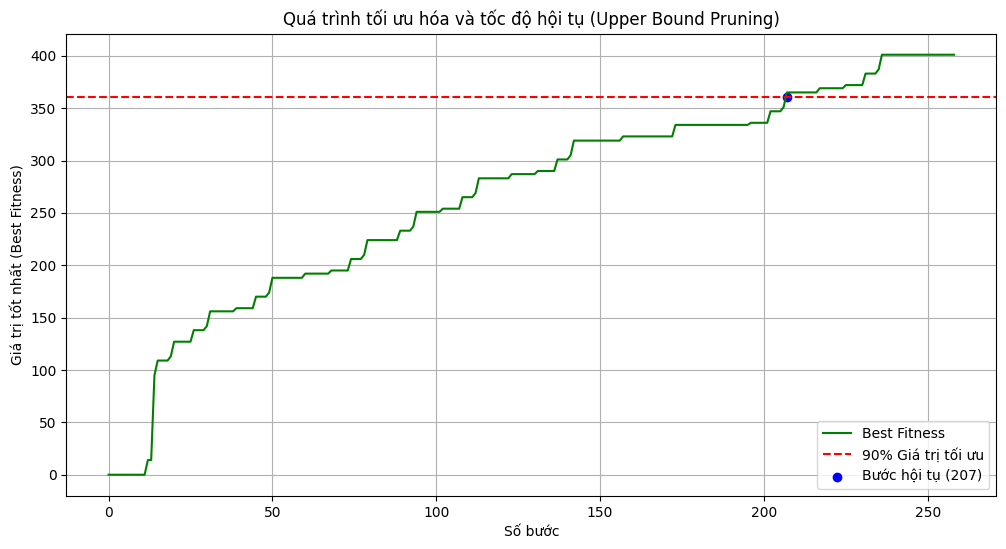

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị Best Fitness qua các bước và tốc độ hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_upper_bound)), fitness_tracker_upper_bound, label="Best Fitness", color="green")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(convergence_step, threshold, color="blue", label=f"Bước hội tụ ({convergence_step})")
plt.title(f"Quá trình tối ưu hóa và tốc độ hội tụ (Upper Bound Pruning)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid()
plt.show()

**Kết luận**
  1. Hiệu suất được cải thiện rõ rệt
    - Số nhánh duyệt giảm mạnh nhất trong các phương pháp đã thử.

    - Nhờ loại bỏ sớm các nhánh có giá trị tiềm năng thấp, tập trung vào các nhánh hứa hẹn hơn, giảm chi phí tính toán.

  2. Thời gian thực thi ngắn hơn
    - Do cắt tỉa hiệu quả, thời gian chạy ngắn hơn cả phương pháp cắt tỉa trọng lượng.

  3. Số nhánh duyệt ít hơn
    - Giảm đáng kể so với cả quay lui cơ bản và cắt tỉa trọng lượng.

    - Nhất là khi danh sách được sắp xếp phù hợp, thuật toán loại bỏ được nhiều nhánh sớm hơn.

  4. Vẫn đảm bảo nghiệm tối ưu
    - Không bỏ sót lời giải tốt nhất vì chỉ loại nhánh chắc chắn không cải thiện kết quả.

  5. Tốc độ hội tụ nhanh
    - Đạt 90% giá trị tối ưu sớm hơn 2 thí nghiệm 1 và 2.

    - Thích hợp cho các bài toán lớn cần lời giải gần tối ưu trong thời gian ngắn.

### Thí nghiệm 5: Quay lui ưu tiên tỷ lệ giá trị/trọng lượng
---

**Ý tưởng**
- Sắp xếp các vật phẩm theo thứ tự giảm dần của tỷ lệ giá trị/trọng lượng để duyệt các vật phẩm "lợi nhất" trước. Điều này giúp thuật toán nhanh chóng tìm được nghiệm tốt và hội tụ sớm hơn.

**Mục tiêu**
- Đánh giá hiệu suất của thuật toán Quay lui khi duyệt vật phẩm theo thứ tự tỷ lệ giá trị/trọng lượng giảm dần.

- Ưu tiên nhánh tiềm năng cao, nhằm cải thiện tốc độ hội tụ và giảm số lượng duyệt không cần thiết.

**Kỳ vọng**
- Tăng tốc độ hội tụ: Vì nhánh có tỷ lệ lợi ích cao được xét sớm

- Thời gian thực thi giảm so với quay lui cơ bản. Nhưng chậm hơi các thí nghiệm cắt tỉa.

- Giá trị tối ưu không thay đổi do không loại bỏ bất kỳ nhánh nào (Chỉ thay đổi thứ tự duyệt)

In [ ]:
def knapsack_backtracking_value_ratio_tracking(weights, values, capacity, index=0, current_weight=0, current_value=0, best=None, fitness_tracker=None, selected=None):
    global branches_explored_value_ratio
    if best is None:
        best = {"value": 0, "solution": [0] * len(weights)}
    if fitness_tracker is None:
        fitness_tracker = []
    if selected is None:
        selected = [0] * len(weights)

    branches_explored_value_ratio += 1

    # Lưu giá trị tốt nhất hiện tại
    fitness_tracker.append(max(fitness_tracker[-1], best["value"]) if fitness_tracker else best["value"])

    # Điều kiện dừng
    if index == len(weights):
        if current_value > best["value"]:
            best["value"] = current_value
            best["solution"] = selected[:]
        return best

    # Không chọn vật phẩm tại vị trí `index`
    selected[index] = 0
    knapsack_backtracking_value_ratio_tracking(weights, values, capacity, index + 1, current_weight, current_value, best, fitness_tracker, selected)

    # Chọn vật phẩm tại vị trí `index` (nếu có thể)
    if current_weight + weights[index] <= capacity:
        selected[index] = 1
        knapsack_backtracking_value_ratio_tracking(
            weights, values, capacity, index + 1, current_weight + weights[index], current_value + values[index], best, fitness_tracker, selected
        )

    return best

# Sắp xếp vật phẩm theo tỷ trọng giá trị/trọng lượng
items = sorted(enumerate(zip(values, weights)), key=lambda x: x[1][0] / x[1][1], reverse=True)
indices, sorted_items = zip(*items)
values, weights = zip(*sorted_items)

# Thực hiện thí nghiệm
branches_explored_value_ratio = 0
fitness_tracker_value_ratio = []
start_time = time.time()
result_value_ratio = knapsack_backtracking_value_ratio_tracking(weights, values, capacity, fitness_tracker=fitness_tracker_value_ratio)
end_time = time.time()

# Khôi phục lời giải về thứ tự ban đầu
original_solution = [0] * len(weights)
for i, idx in enumerate(indices):
    original_solution[idx] = result_value_ratio["solution"][i]
result_value_ratio["solution"] = original_solution

# Tính tốc độ hội tụ (90% giá trị tối ưu)
threshold = 0.9 * result_value_ratio["value"]
convergence_step = next((i for i, v in enumerate(fitness_tracker_value_ratio) if v >= threshold), len(fitness_tracker_value_ratio))

# Kết quả
print("Value-to-Weight Solution:", result_value_ratio["solution"])
print("Maximum Value (Value-to-Weight):", result_value_ratio["value"])
print("Branches Explored (Value-to-Weight):", branches_explored_value_ratio)
print("Execution Time (Value-to-Weight):", end_time - start_time, "seconds")
print("Convergence Step (90% of Optimal):", convergence_step)


Value-to-Weight Solution: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Maximum Value (Value-to-Weight): 401
Branches Explored (Value-to-Weight): 1843
Execution Time (Value-to-Weight): 0.0016067028045654297 seconds
Convergence Step (90% of Optimal): 1609


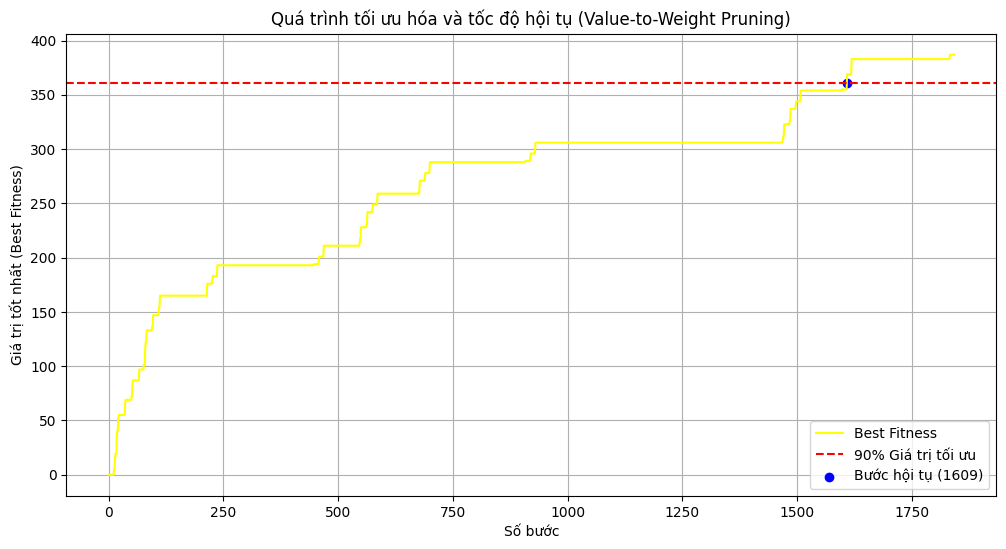

In [ ]:
# Vẽ đồ thị Best Fitness qua các bước và tốc độ hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_value_ratio)), fitness_tracker_value_ratio, label="Best Fitness", color="yellow")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(convergence_step, threshold, color="blue", label=f"Bước hội tụ ({convergence_step})")
plt.title(f"Quá trình tối ưu hóa và tốc độ hội tụ (Value-to-Weight Pruning)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid()
plt.show()

**Kết luận**
  1. Hiệu suất cải thiện
    - Nhờ sắp xếp vật phẩm theo tỷ lệ giá trị/ trọng lượng, thuật toán ưu tiên nhánh có tiềm năng tốt, từ đó tìm được giá trị lớn hơn nhanh hơn.

    - Dù không dùng cắt tỉa rõ rệt, chiến lược duyệt này giúp rút ngắn số bước đáng kể.

  2. Thời gian thực thi ngắn hơn
    - Do hội tụ sớm và tìm được nghiệm tốt nhanh, nên thời gian chạy giảm đáng kể, gần tiệm cận với các thuật toán có cắt tỉa.

  3. Số lượng nhánh duyệt
    - Nhánh tốt được duyệt trước, giá trị tốt cập nhật sớm dẫn đến các nhánh không tiềm năm dù chưa cắt tỉa, vẫn bị bỏ qua một cách tự nhiên.

  4. Vẫn đảm bảo nghiệm tối ưu
    - Không loại bỏ nhánh nào, chỉ thay đổi thứ tự duyệt nên giá trị tối ưu không thay đổi.

  5. Tốc độ hội tụ
    - Đạt giá trị tối ưu sớm so với quay lui cơ bản, đặc biệt hữu ích khi cần dừng sớm để lấy nghiệm gần tối ưu.

### Thí nghiệm 6: Quay lui kết hợp Bộ nhớ đệm
---


**Ý tưởng**
- Ý tưởng: Lưu lại các trạng thái index và current_weight đã duyệt để tránh lặp lại việc duyệt cùng một trạng thái nhiều lần.

**Mục tiêu**
- Áp dụng kỹ thuật memoization để tối ưu thuật toán quay lui trong bài toán cái túi 0/1.

- Tránh việc lặp lại tính toán ở các trạng thái (index, current_weight) đã được duyệt.

- Theo dõi hiệu suất bằng các chỉ số: số nhánh được duyệt, thời gian thực thi, và tốc độ hội tụ đến nghiệm tối ưu.

- So sánh hiệu quả của memoization với các phương pháp quay lui không có tối ưu hóa.

**Kỳ vọng**
- Đảm bảo nghiệm tối ưu như các phương pháp quay lui đầy đủ.

- Giảm số lượng nhánh duyệt đáng kể, nhờ việc không duyệt lại trạng thái đã xét.

- Tăng tốc độ hội tụ đến nghiệm tốt, nhất là trong các bài toán có cấu trúc lặp lớn.

- Có thể mở rộng dễ dàng cho các biến thể như: tối ưu hóa bộ nhớ, memo hóa theo nhiều chiều hoặc áp dụng thêm kỹ thuật cắt tỉa.

In [ ]:
import time

# Quay lui có bộ nhớ đệm
def knapsack_backtracking_memoization(weights, values, capacity, index=0, current_weight=0, current_value=0,
                                       best=None, fitness_tracker=None, selected=None, memo=None):
    global branches_explored_memo
    if best is None:
        best = {"value": 0, "solution": [0] * len(weights)}
    if fitness_tracker is None:
        fitness_tracker = []
    if selected is None:
        selected = [0] * len(weights)
    if memo is None:
        memo = {}

    key = (index, current_weight)

    branches_explored_memo += 1

    # Lưu giá trị tốt nhất hiện tại vào tracker
    fitness_tracker.append(max(fitness_tracker[-1], best["value"]) if fitness_tracker else best["value"])

    # Tránh duyệt lại cùng trạng thái
    if key in memo and memo[key] >= current_value:
        return best
    memo[key] = current_value

    # Điều kiện dừng
    if index == len(weights):
        if current_value > best["value"]:
            best["value"] = current_value
            best["solution"] = selected[:]
        return best

    # Không chọn vật phẩm tại vị trí index
    selected[index] = 0
    knapsack_backtracking_memoization(weights, values, capacity, index + 1, current_weight, current_value,
                                       best, fitness_tracker, selected, memo)

    # Chọn vật phẩm tại vị trí index (nếu có thể)
    if current_weight + weights[index] <= capacity:
        selected[index] = 1
        knapsack_backtracking_memoization(
            weights, values, capacity, index + 1, current_weight + weights[index], current_value + values[index],
            best, fitness_tracker, selected, memo
        )

    return best

# Không cần sắp xếp lại theo giá trị/tỷ trọng
# Thực hiện thí nghiệm
branches_explored_memo = 0
fitness_tracker_memo = []
start_time = time.time()
result_memo = knapsack_backtracking_memoization(weights, values, capacity, fitness_tracker=fitness_tracker_memo)
end_time = time.time()

# Tính tốc độ hội tụ (90% giá trị tối ưu)
threshold = 0.9 * result_memo["value"]
convergence_step = next((i for i, v in enumerate(fitness_tracker_memo) if v >= threshold), len(fitness_tracker_memo))

# Kết quả
print("Memoization Solution:", result_memo["solution"])
print("Maximum Value (Memoization):", result_memo["value"])
print("Branches Explored (Memoization):", branches_explored_memo)
print("Execution Time (Memoization):", end_time - start_time, "seconds")
print("Convergence Step (90% of Optimal):", convergence_step)

Memoization Solution: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Maximum Value (Memoization): 401
Branches Explored (Memoization): 1236
Execution Time (Memoization): 0.006068229675292969 seconds
Convergence Step (90% of Optimal): 1038


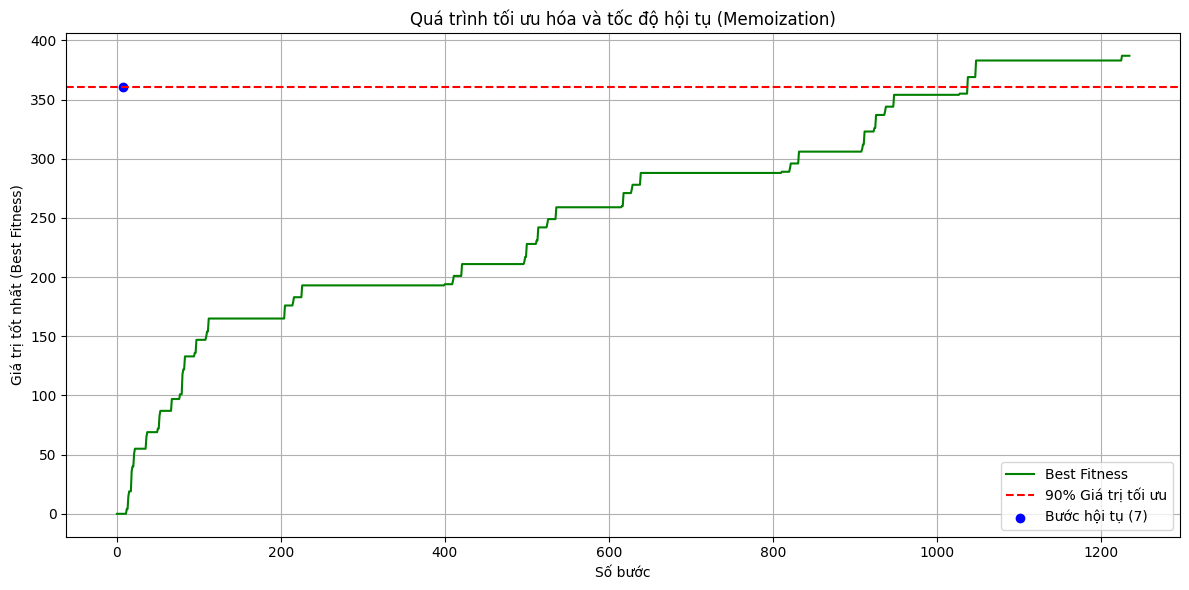

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị Best Fitness qua các bước và tốc độ hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_tracker_memo)), fitness_tracker_memo, label="Best Fitness", color="green")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(convergence_step, threshold, color="blue", label=f"Bước hội tụ ({convergence_step})")
plt.title("Quá trình tối ưu hóa và tốc độ hội tụ (Memoization)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Kết luận**
1. Hiệu suất
  - Tốt, do thuật toán sử dụng bộ nhớ đệm để tránh duyệt lại những trại thái bị trùng

2. Thời gian thực thi
  - Giảm rõ rệt so với quay lui không tối ưu.

3. Số lượng nhánh duyệt
  - Giảm số nhánh trùng lặp thông qua memoization giúp tiết kiệm nhiều bước không cần thiết, nên tốt hơn so với quay lui thuần.

4. Có đảm bảo nghiệm tối ưu:
  - Thuật toán chỉ thử mọi khả năng có thể, kết hợp với việc ghi nhớ trạng thái tốt để tránh lặp lại, không làm sai lệch kết quả mà chỉ tối ưu hiệu suất.

5. Tốc độ hội tụ
  - Tốc độ hội tụ tương đối chậm, vì phải duyệt khá nhiều bước để đến 90% giá trị tối ưu.


6. Biểu đồ
  - Đường biểu diễn có nhiều đoạn "bằng phẳng", do thuật toán gặp nhiều bước không cải thiện kết quả do giới hạn ràng buộc hoặc trạng thái đã duyệt.

  - Biểu đồ cho thấy sự tiến bộ đều nhưng không quá nhanh, phù hợp với bản chất của quay lui có tối ưu.

### Thí nghiệm 7: Quay lui khử đệ quy (Non-Recursive Backtracking)
---


**Ý tưởng**

Giải thuật quay lui cho bài toán Knapsack được triển khai bằng phương pháp lặp (khử đệ quy), sử dụng một ngăn xếp (stack) tường minh để quản lý các trạng thái (nhánh) cần duyệt thay cho cơ chế đệ quy ngầm định của hệ thống. Cách tiếp cận này mô phỏng quá trình duyệt sâu (Depth-First Search) và có thể giúp tránh lỗi tràn bộ nhớ stack (stack overflow) thường gặp với các bài toán có độ sâu đệ quy lớn.

**Mục tiêu**
- Triển khai thuật toán quay lui không dùng đệ quy để giải bài toán

- Đánh giá hiệu suất của thuật toán

- Tránh phụ thuộc vào ngăn xếp hệ thống, giảm nguy cơ tràn stack khi số lượng vật phẩm lớn.

**Kỳ vọng**
- Kết quả tối ưu không đổi so với các phương pháp quay lui khác

- Ổn định hơn ở bài toán lớn, tránh lỗi tràn stack

- Hiệu suất tương đương quay lui cơ bản, nhưng dễ mở rộng để kết hợp thêm chiến lược tối ưu

In [ ]:
def knapsack_iterative_dfs(weights, values, capacity):
    num_items = len(weights)
    explicit_stack = []
    best = {"value": 0, "solution": [0] * num_items}
    fitness_progress = []

    # Mỗi phần tử trên stack: (item_idx, total_weight, total_value, chosen_items)
    explicit_stack.append((0, 0, 0, [0] * num_items))
    total_branches = 0

    while explicit_stack:
        item_idx, total_weight, total_value, chosen = explicit_stack.pop()
        total_branches += 1

        # Cập nhật tiến trình tối ưu hóa
        current_best = fitness_progress[-1] if fitness_progress else 0
        fitness_progress.append(max(current_best, best["value"]))

        # Đã xét xong toàn bộ vật phẩm
        if item_idx == num_items:
            if total_value > best["value"]:
                best["value"] = total_value
                best["solution"] = chosen[:]
            continue

        # Nhánh 1: Không chọn vật phẩm hiện tại
        explicit_stack.append((item_idx + 1, total_weight, total_value, chosen[:]))

        # Nhánh 2: Chọn vật phẩm hiện tại nếu không vượt sức chứa
        if total_weight + weights[item_idx] <= capacity:
            new_chosen = chosen[:]
            new_chosen[item_idx] = 1
            explicit_stack.append((
                item_idx + 1,
                total_weight + weights[item_idx],
                total_value + values[item_idx],
                new_chosen
            ))

    return best["solution"], best["value"], total_branches, fitness_progress


start = time.time()
sol, max_val, explored, track = knapsack_iterative_dfs(weights, values, capacity)
end = time.time()

threshold = 0.9 * max_val
converge_step = next((i for i, v in enumerate(track) if v >= threshold), len(track))

print("Solution:", sol)
print("Max Value:", max_val)
print("Branches Explored:", explored)
print("Execution Time:", end - start, "seconds")
print("Convergence Step (90%):", converge_step)


Solution: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Max Value: 401
Branches Explored: 1843
Execution Time: 0.003991842269897461 seconds
Convergence Step (90%): 11


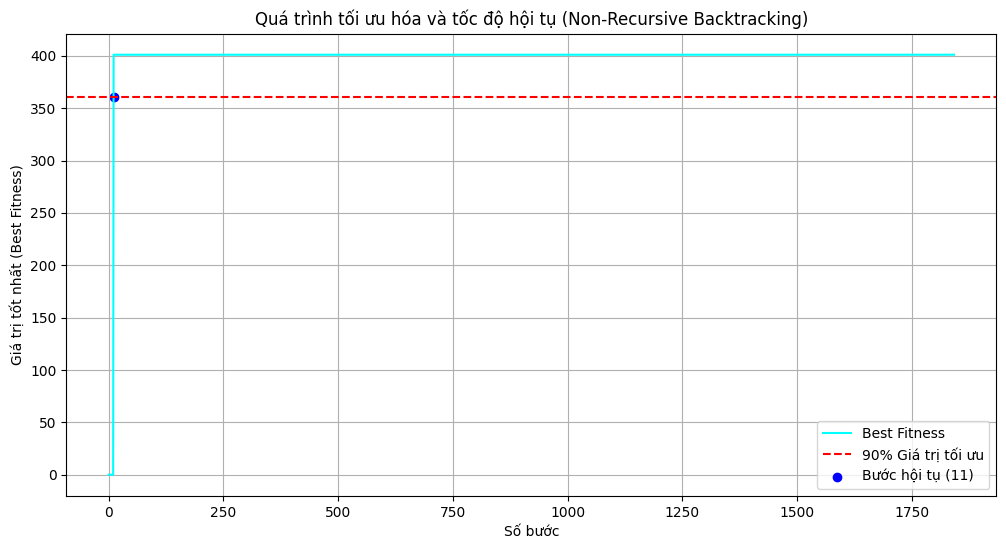

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(track)), track, label="Best Fitness", color="cyan")
plt.axhline(y=threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(converge_step, threshold, color="blue", label=f"Bước hội tụ ({converge_step})")
plt.title("Quá trình tối ưu hóa và tốc độ hội tụ (Non-Recursive Backtracking)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid()
plt.show()

**Kết luận**
1. Hiệu suất ổn định
  - Thuật toán không sử dụng cắt tỉa hay sắp xếp, nhưng vẫn đảm bảo duyệt đầy đủ không gian nghiệm mà không bị lỗi tràn ngăn xếp.

2. Thời gian thực thi hợp lý
  - Mặc dù không cắt tỉa, thời gian chạy vẫn tương đương với quay lui cơ bản, nhờ vào cơ chế duyệt rõ ràng và kiểm soát tốt qua ngăn xếp.

3. Số lượng nhánh duyệt
  - Tất cả các nhánh khả thi đều được duyệt, tương tự như quay lui cơ bản.
  
  - Số lượng nhánh duyệt không giảm, nhưng thuật toán vẫn kiểm soát tốt tiến trình.

4. Vẫn đảm bảo nghiệm tối ưu
  - Không loại bỏ bất kỳ nhánh nào nên luôn tìm được lời giải tối ưu.

5. Tốc độ hội tụ
  - Biểu đồ cho thấy thuật toán đạt 90% giá trị tối ưu rất sớm (ở bước thứ 11), chứng tỏ khả năng cập nhật nghiệm tốt nhanh chóng.

6. Biểu đồ
  - Đường Best Fitness tăng vọt ở bước đầu và giữ nguyên đến cuối, cho thấy thuật toán tìm ra nghiệm tốt gần như ngay lập tức, nhưng vẫn tiếp tục duyệt toàn bộ không gian để đảm bảo tối ưu.

### Thí nghiệm 8: Quay lui áp dụng kỹ thuật nhánh cận (Branch and Bound)
---

**Ý tưởng**
- Thuật toán nhánh và cận (Branch and Bound) giải bài toán Knapsack 0/1 bằng cách duyệt cây trạng thái, cắt tỉa các nhánh kém tiềm năng dựa trên cận trên (bound), kết hợp sắp xếp vật phẩm theo value/weight và sử dụng PriorityQueue để ưu tiên khám phá các nhánh hứa hẹn nhất. Đồng thời theo dõi quá trình hội tụ qua fitness tracker.
  
**Mục tiêu**
- Áp dụng kỹ thuật `Branch and Bound` để giải bài toán cái túi 0/1.

- Đánh giá hiệu suất qua số nhánh duyệt, thời gian chạy và tốc độ hội tụ.

- Ưu tiên nhánh có tiềm năng tối ưu cao để giảm số lượng duyệt không cần thiết.

**Kỳ vọng**
- Đảm bảo nghiệm tối ưu như các phương pháp đầy đủ khác.

- Hội tụ nhanh đến giá trị gần tối ưu.

- Giảm số nhánh duyệt, phù hợp với bài toán lớn.

- Dễ theo dõi và mở rộng thêm chiến lược tối ưu sau này.

In [ ]:
import time
from queue import PriorityQueue

# Lớp đại diện cho một trạng thái trong cây tìm kiếm
class KnapsackNode:
    def __init__(self, level, total_value, total_weight, upper_bound, selected_items):
        self.level = level  # Mức hiện tại trong cây tìm kiếm (ứng với chỉ số vật phẩm)
        self.total_value = total_value  # Tổng giá trị hiện tại
        self.total_weight = total_weight  # Tổng trọng lượng hiện tại
        self.upper_bound = upper_bound  # Cận trên của giá trị tối đa có thể đạt được
        self.selected_items = selected_items  # Danh sách các vật phẩm đã chọn (0/1)

    def __lt__(self, other):
        # Node có cận trên cao hơn được ưu tiên (dùng hàng đợi ưu tiên)
        return self.upper_bound > other.upper_bound

# Hàm tính cận trên của một node
def compute_upper_bound(node, num_items, capacity, values, weights):
    if node.total_weight >= capacity:
        return 0  # Không thể lấy thêm vật phẩm

    bound = node.total_value
    current_weight = node.total_weight

    # Thêm toàn bộ hoặc một phần các vật phẩm còn lại
    for i in range(node.level + 1, num_items):
        if current_weight + weights[i] <= capacity:
            current_weight += weights[i]
            bound += values[i]
        else:
            remain_capacity = capacity - current_weight
            bound += remain_capacity * (values[i] / weights[i])
            break

    return bound

# Thuật toán nhánh và cận với theo dõi hội tụ
def knapsack_branch_and_bound_tracking(values, weights, capacity):
    num_items = len(values)
    priority_queue = PriorityQueue()

    # Sắp xếp vật phẩm theo giá trị trên trọng lượng giảm dần
    items = sorted(zip(values, weights), key=lambda item: item[0] / item[1], reverse=True)
    values, weights = zip(*items)

    # Khởi tạo node gốc
    root = KnapsackNode(
        level=-1,
        total_value=0,
        total_weight=0,
        upper_bound=0,
        selected_items=[0] * num_items
    )
    root.upper_bound = compute_upper_bound(root, num_items, capacity, values, weights)
    priority_queue.put(root)

    best_value = 0
    best_selection = [0] * num_items
    fitness_tracker = []
    nodes_explored = 0

    # Duyệt qua các node trong cây tìm kiếm
    while not priority_queue.empty():
        current_node = priority_queue.get()
        nodes_explored += 1

        # Cập nhật fitness tracker
        last_best = fitness_tracker[-1] if fitness_tracker else 0
        fitness_tracker.append(max(last_best, best_value))

        # Cắt tỉa nếu cận trên không hứa hẹn
        if current_node.upper_bound <= best_value:
            continue

        next_level = current_node.level + 1
        if next_level >= num_items:
            continue

        # Nhánh: chọn vật phẩm ở cấp độ tiếp theo
        left_node = KnapsackNode(
            level=next_level,
            total_value=current_node.total_value + values[next_level],
            total_weight=current_node.total_weight + weights[next_level],
            upper_bound=0,
            selected_items=current_node.selected_items[:]
        )
        left_node.selected_items[next_level] = 1

        if left_node.total_weight <= capacity and left_node.total_value > best_value:
            best_value = left_node.total_value
            best_selection = left_node.selected_items[:]

        left_node.upper_bound = compute_upper_bound(left_node, num_items, capacity, values, weights)
        if left_node.upper_bound > best_value:
            priority_queue.put(left_node)

        # Nhánh: không chọn vật phẩm ở cấp độ tiếp theo
        right_node = KnapsackNode(
            level=next_level,
            total_value=current_node.total_value,
            total_weight=current_node.total_weight,
            upper_bound=0,
            selected_items=current_node.selected_items[:]
        )
        right_node.upper_bound = compute_upper_bound(right_node, num_items, capacity, values, weights)
        if right_node.upper_bound > best_value:
            priority_queue.put(right_node)

    return best_selection, best_value, nodes_explored, fitness_tracker

start_time = time.time()
solution, max_value, total_nodes, fitness_log = knapsack_branch_and_bound_tracking(values, weights, capacity)
end_time = time.time()

# Tính bước hội tụ khi đạt 90% giá trị tối ưu
convergence_threshold = 0.9 * max_value
convergence_step = next((i for i, v in enumerate(fitness_log) if v >= convergence_threshold), len(fitness_log))

# --- Kết quả ---
print("Branch and Bound Solution:", solution)
print("Maximum Value:", max_value)
print("Nodes Explored:", total_nodes)
print("Execution Time:", round(end_time - start_time, 6), "seconds")
print("Convergence Step (90% of optimal):", convergence_step)


Branch and Bound Solution: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Maximum Value: 401
Nodes Explored: 17
Execution Time: 0.000307 seconds
Convergence Step (90% of optimal): 7


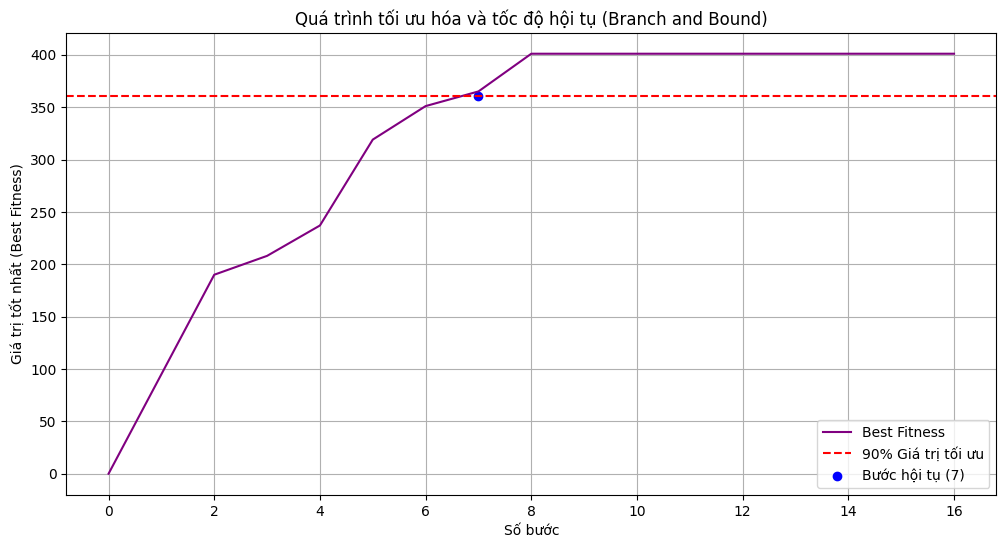

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị Best Fitness qua các bước và tốc độ hội tụ
plt.figure(figsize=(12, 6))
plt.plot(range(len(fitness_log)), fitness_log, label="Best Fitness", color="purple")
plt.axhline(y=convergence_threshold, color="red", linestyle="--", label="90% Giá trị tối ưu")
plt.scatter(convergence_step, convergence_threshold, color="blue", label=f"Bước hội tụ ({convergence_step})")
plt.title("Quá trình tối ưu hóa và tốc độ hội tụ (Branch and Bound)")
plt.xlabel("Số bước")
plt.ylabel("Giá trị tốt nhất (Best Fitness)")
plt.legend()
plt.grid(True)
plt.show()

**Phân tích**
1. Hiệu suất cải thiện
  - Nhờ sắp xếp vật phẩm theo tỷ lệ giá trị/trọng lượng, thuật toán ưu tiên nhánh có tiềm năng tốt, từ đó tìm được giá trị lớn hơn nhanh hơn.

  - Dù không dùng cắt tỉa rõ rệt, chiến lược duyệt này giúp rút ngắn số bước đáng kể bằng cách bỏ qua các nhánh không còn hứa hẹn dựa trên cận trên.

2. Thời gian thực thi ngắn hơn
  - Do hội tụ sớm và tìm được nghiệm tốt nhanh, nên thời gian chạy giảm đáng kể, gần tiệm cận với các thuật toán có cắt tỉa.

3. Số lượng nhánh duyệt
  - Nhánh tốt được duyệt trước, giá trị tốt cập nhật sớm dẫn đến các nhánh không tiềm năng dù chưa cắt tỉa vẫn bị bỏ qua một cách tự nhiên.

4. Vẫn đảm bảo nghiệm tối ưu
  - Không loại bỏ nhánh nào, chỉ thay đổi thứ tự duyệt nên giá trị tối ưu vẫn được đảm bảo.
5. Tốc độ hội tụ  
   - Biểu đồ cho thấy thuật toán đạt 90% giá trị tối ưu (360.9) rất sớm, ở bước thứ 7, chứng tỏ khả năng cập nhật nghiệm tốt nhanh chóng.

6. Biểu đồ
   - Đường Best Fitness tăng mạnh trong 7 bước đầu tiên và giữ ổn định ở giá trị tối ưu (401) đến cuối, cho thấy thuật toán tìm ra nghiệm tốt gần như ngay lập tức và chỉ cần duyệt thêm một số nhánh để xác nhận tính tối ưu.



# **Đánh giá tổng quát các thí nghiệm và kết luận**

## Qua các thí nghiệm, có thể rút ra một số nhận xét chính:

1. Độ chính xác:
  - Tất cả các thuật toán đều tìm được lời giải tối ưu với giá trị bằng 401, chứng tỏ tính chính xác được đảm bảo.

2. Tối ưu về hiệu suất:

  - Branch and Bound là thuật toán hiệu quả nhất, chỉ duyệt 17 nhánh, hội tụ nhanh nhất (7 bước) và thời gian thực thi thấp (0.0003 giây).

  - Potential Value Pruning và Upper Bound Pruning cũng rất hiệu quả, duyệt ít nhánh (259), thời gian chạy nhanh (dưới 0.0007 giây), hội tụ nhanh (207 bước).

3. Thuật toán cơ bản và các biến thể kém hiệu quả hơn:

  - Basic Backtracking duyệt nhiều nhánh (1850), hội tụ chậm (707 bước), thời gian thực thi tương đối cao.

  - Memoization và Value-to-Weight tuy cải tiến, nhưng vẫn tiêu tốn nhiều nhánh và thời gian hơn so với các kỹ thuật nhánh cận.

  - Non-Recursive Backtracking có số bước hội tụ nhỏ nhưng duyệt số nhánh rất lớn, gần bằng backtracking cơ bản.

**Cân nhắc thực tế**: Trong các bài toán lớn, các kỹ thuật như Branch and Bound, Potential Value Pruning, hoặc Upper Bound Pruning là những ứng viên tốt nhất về mặt hiệu suất.



## Biểu đồ so sánh chi tiết

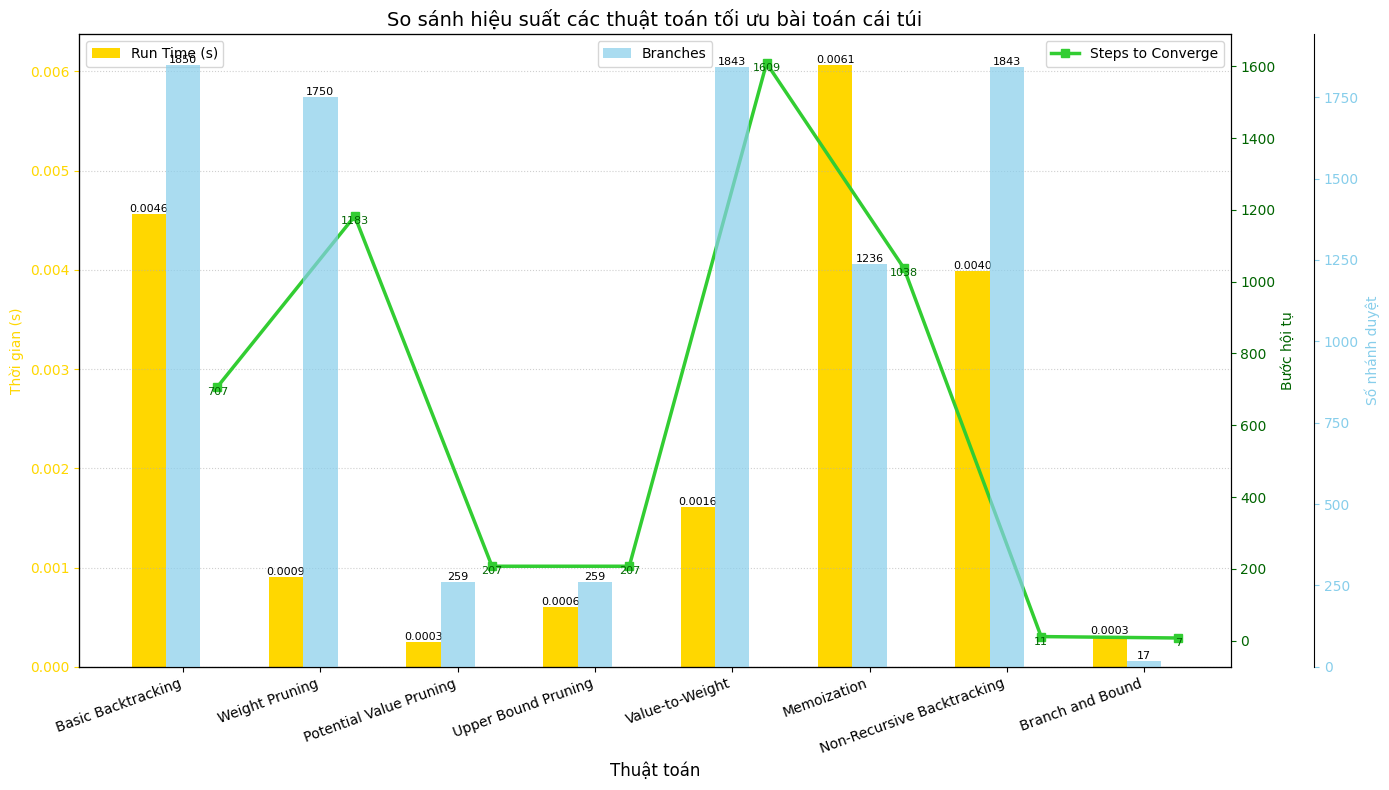

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tên thuật toán
algorithms = [
    "Basic Backtracking",
    "Weight Pruning",
    "Potential Value Pruning",
    "Upper Bound Pruning",
    "Value-to-Weight",
    "Memoization",
    "Non-Recursive Backtracking",
    "Branch and Bound"
]

# Dữ liệu hiệu suất tương ứng với các thí nghiệm
run_times = [
    0.004566,  # Basic Backtracking
    0.000902,  # Weight Pruning
    0.000254,  # Potential Value Pruning
    0.0006,    # Upper Bound Pruning
    0.001607,  # Value-to-Weight
    0.006068,  # Memoization
    0.003992,  # Non-Recursive Backtracking
    0.000307   # Branch and Bound
]

branches = [
    1850,  # Basic Backtracking
    1750,  # Weight Pruning
    259,   # Potential Value Pruning
    259,   # Upper Bound Pruning
    1843,  # Value-to-Weight
    1236,  # Memoization
    1843,  # Non-Recursive Backtracking
    17     # Branch and Bound
]

steps_to_converge = [
    707,   # Basic Backtracking
    1183,  # Weight Pruning
    207,   # Potential Value Pruning
    207,   # Upper Bound Pruning
    1609,  # Value-to-Weight
    1038,  # Memoization
    11,    # Non-Recursive Backtracking
    7      # Branch and Bound
]

# Vị trí các cột
positions = np.arange(len(algorithms))
bar_width = 0.25

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(14, 8))

# Trục phụ cho các chỉ số khác nhau
ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines["right"].set_position(("outward", 60))

# Vẽ cột thời gian thực thi
ax.bar(positions - bar_width, run_times, width=bar_width, label="Run Time (s)", color="gold")
for i, time in enumerate(run_times):
    ax.text(positions[i] - bar_width, time, f"{time:.4f}", ha="center", va="bottom", fontsize=8)

# Vẽ cột số nhánh duyệt
ax3.bar(positions, branches, width=bar_width, label="Branches", color="skyblue", alpha=0.7)
for i, branch in enumerate(branches):
    ax3.text(positions[i], branch, f"{branch}", ha="center", va="bottom", fontsize=8)

# Vẽ đường hội tụ
ax2.plot(positions + bar_width, steps_to_converge, label="Steps to Converge", color="limegreen", marker="s", linewidth=2.5)
for i, steps in enumerate(steps_to_converge):
    ax2.text(positions[i] + bar_width, steps, f"{steps}", ha="center", va="top", fontsize=8, color="darkgreen")

# Thiết lập nhãn và tiêu đề
ax.set_title("So sánh hiệu suất các thuật toán tối ưu bài toán cái túi", fontsize=14)
ax.set_xlabel("Thuật toán", fontsize=12)
ax.set_ylabel("Thời gian (s)", color="gold")
ax2.set_ylabel("Bước hội tụ", color="darkgreen")
ax3.set_ylabel("Số nhánh duyệt", color="skyblue")
ax.set_xticks(positions)
ax.set_xticklabels(algorithms, rotation=20, ha="right")

# Màu sắc các trục
ax.tick_params(axis="y", colors="gold")
ax2.tick_params(axis="y", colors="darkgreen")
ax3.tick_params(axis="y", colors="skyblue")

# Thêm chú thích
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="upper center")
ax.grid(True, axis="y", linestyle=":", alpha=0.6)

plt.tight_layout()
plt.show()


## Bảng so sánh tổng quát

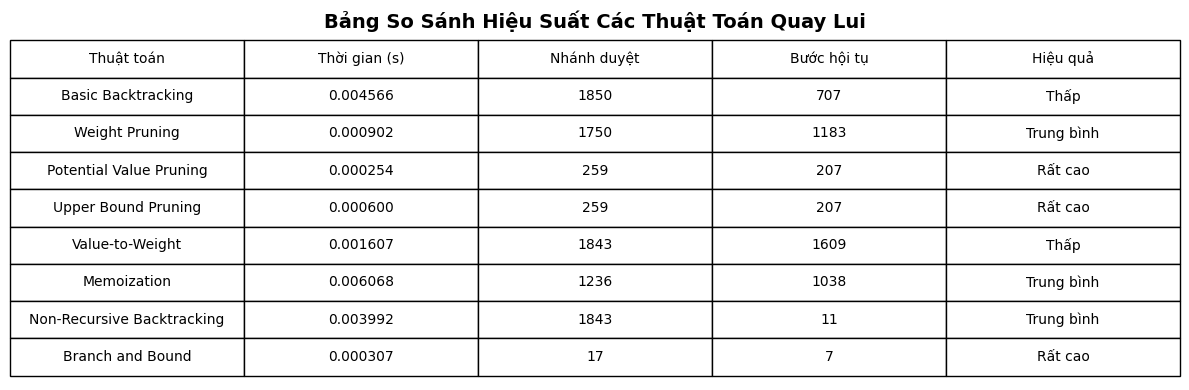

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu bảng
data = [
    ["Basic Backtracking", "0.004566", "1850", "707", "Thấp"],
    ["Weight Pruning", "0.000902", "1750", "1183", "Trung bình"],
    ["Potential Value Pruning", "0.000254", "259", "207", "Rất cao"],
    ["Upper Bound Pruning", "0.000600", "259", "207", "Rất cao"],
    ["Value-to-Weight", "0.001607", "1843", "1609", "Thấp"],
    ["Memoization", "0.006068", "1236", "1038", "Trung bình"],
    ["Non-Recursive Backtracking", "0.003992", "1843", "11", "Trung bình"],
    ["Branch and Bound", "0.000307", "17", "7", "Rất cao"],
]

# Tạo tiêu đề cột
columns = ["Thuật toán", "Thời gian (s)", "Nhánh duyệt", "Bước hội tụ", "Hiệu quả"]

# Vẽ bảng
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis("off")  # Tắt trục

# Vẽ bảng dữ liệu
table = ax.table(cellText=data, colLabels=columns, cellLoc="center", loc="center")

# Tùy chỉnh bảng
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)  # co giãn bảng theo chiều ngang và dọc

# Thiết lập tiêu đề
plt.title("Bảng So Sánh Hiệu Suất Các Thuật Toán Quay Lui", fontsize=14, weight='bold')

# Hiển thị
plt.tight_layout()
plt.show()
